In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Cargar imagen en escala de grises
img = cv2.imread("../../datos/bogota.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(
        "La imagen no se cargó correctamente. Verifica el nombre o la ruta del archivo."
    )

In [49]:
# 1. Umbralización fija
_, thresh_fixed = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [50]:
# 2. Umbralización adaptativa
thresh_adaptive = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2
)

In [51]:
# 3. Detección de contornos (usamos la binarización adaptativa)
contours, _ = cv2.findContours(
    thresh_adaptive, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

In [52]:
# 4. Dibujar contornos sobre la imagen original
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for contour in contours:
    cv2.drawContours(img_color, [contour], -1, (0, 255, 0), 2)

In [53]:
# 5. Calcular momentos, centros de masa, y bounding boxes
total_area = 0
total_perimeter = 0
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_color, (cX, cY), 4, (255, 0, 0), -1)

    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)

    total_area += cv2.contourArea(contour)
    total_perimeter += cv2.arcLength(contour, True)

In [54]:
# 6. Mostrar métricas
num_shapes = len(contours)
avg_area = total_area / num_shapes if num_shapes else 0
avg_perimeter = total_perimeter / num_shapes if num_shapes else 0

In [55]:
print(f"Número de formas detectadas: {num_shapes}")
print(f"Área promedio: {avg_area:.2f}")
print(f"Perímetro promedio: {avg_perimeter:.2f}")

Número de formas detectadas: 135
Área promedio: 259.32
Perímetro promedio: 59.68


In [56]:
# 7. Mostrar imágenes en una fila
titles = [
    "Original en grises",
    "Umbral fijo",
    "Umbral adaptativo",
    "Contornos y bounding boxes",
]
images = [
    img,
    thresh_fixed,
    thresh_adaptive,
    cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB),
]
cmaps = ["gray", "gray", "gray", None]

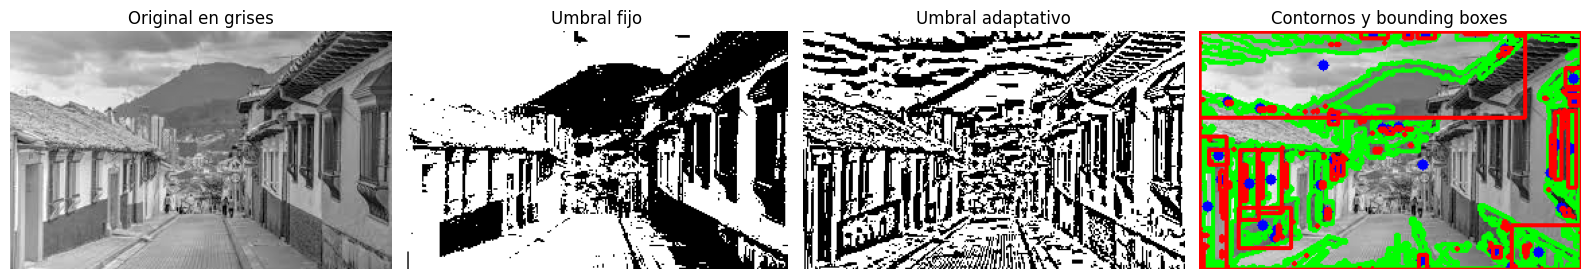

In [57]:
plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap=cmaps[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()